In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [6]:
start = '2015-01-01'
end = '2024-12-31'

df = yf.download('AAPL', start, end)
df.head()

C:\Users\Bhramari\AppData\Local\Temp\ipykernel_18856\1849421686.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start, end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.261047,24.729270,23.821672,24.718174,212818400
2015-01-05,23.577576,24.110152,23.391175,24.030265,257142000
2015-01-06,23.579788,23.839418,23.218079,23.641922,263188400
2015-01-07,23.910431,24.010288,23.677428,23.788382,160423600
2015-01-08,24.829126,24.886823,24.121244,24.238856,237458000


In [9]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-12-23,254.367004,254.745650,252.553435,253.868773,40858800
2024-12-24,257.286682,257.296626,254.386957,254.586262,23234700
2024-12-26,258.103729,259.179926,256.718662,257.276679,27237100
2024-12-27,254.685867,257.784882,252.164818,256.917934,42355300
2024-12-30,251.307877,252.603281,249.863009,251.337769,35557500


In [10]:
df = df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-01-02,24.261047,24.729270,23.821672,24.718174,212818400
1,2015-01-05,23.577576,24.110152,23.391175,24.030265,257142000
2,2015-01-06,23.579788,23.839418,23.218079,23.641922,263188400
3,2015-01-07,23.910431,24.010288,23.677428,23.788382,160423600
4,2015-01-08,24.829126,24.886823,24.121244,24.238856,237458000


In [11]:
df = df.drop(['Date',], axis = 1)
df.head()

C:\Users\Bhramari\AppData\Local\Temp\ipykernel_18856\3800106837.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date',], axis = 1)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,24.261047,24.729270,23.821672,24.718174,212818400
1,23.577576,24.110152,23.391175,24.030265,257142000
2,23.579788,23.839418,23.218079,23.641922,263188400
3,23.910431,24.010288,23.677428,23.788382,160423600
4,24.829126,24.886823,24.121244,24.238856,237458000


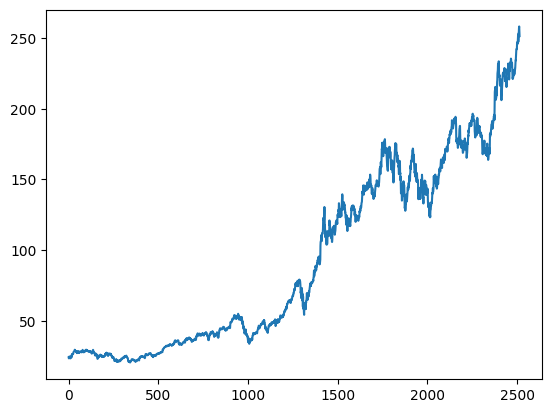

In [12]:
plt.plot(df.Close)

In [13]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,228.410515
2511,228.797497
2512,229.297937
2513,229.784480


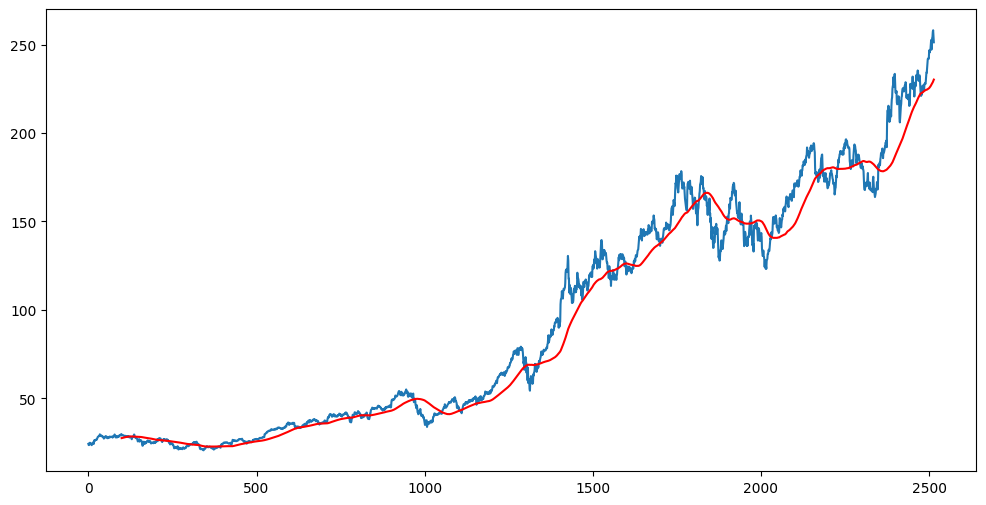

In [14]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.show()

In [15]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,210.238068
2511,210.666910
2512,211.097455
2513,211.521335


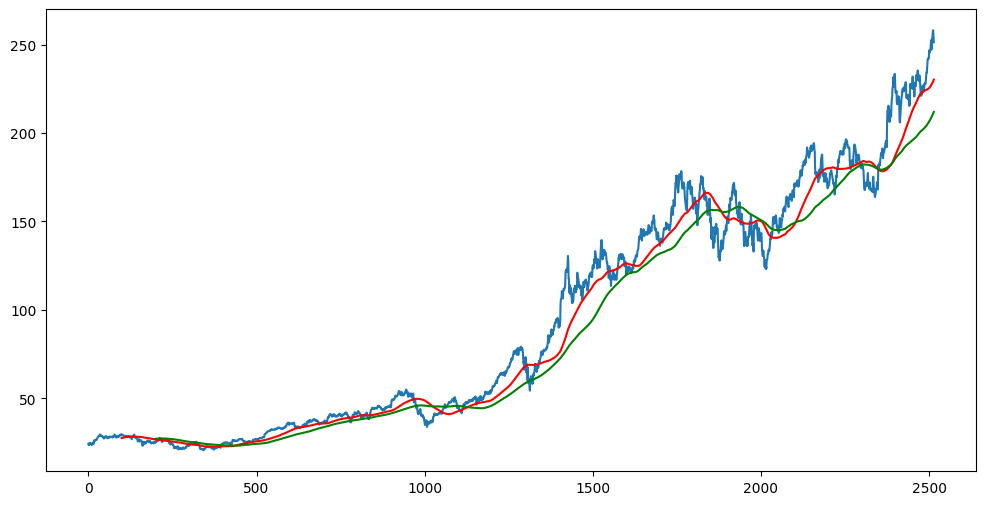

In [16]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.show()

In [17]:
df.shape

(2515, 5)

In [18]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [19]:
data_training.head()

Ticker,AAPL
0,24.261047
1,23.577576
2,23.579788
3,23.910431
4,24.829126


In [20]:
data_testing.head()

Ticker,AAPL
1760,175.864670
1761,174.707809
1762,174.090149
1763,178.443115
1764,176.178421


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

In [23]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02328839],
       [0.01891198],
       [0.01892615],
       ...,
       [0.97457529],
       [1.        ],
       [0.99347125]])

In [24]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [25]:
x_train.shape

(1660, 100, 1)

In [26]:
#ML model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [27]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))



model.add(Dense(units = 1))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [29]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)


Epoch 1/50

52/52 [==============================] - 25s 242ms/step - loss: 0.0318
Epoch 2/50
52/52 [==============================] - 12s 223ms/step - loss: 0.0063
Epoch 3/50
52/52 [==============================] - 11s 214ms/step - loss: 0.0053
Epoch 4/50
52/52 [==============================] - 13s 240ms/step - loss: 0.0047
Epoch 5/50
52/52 [==============================] - 10s 191ms/step - loss: 0.0050
Epoch 6/50
52/52 [==============================] - 14s 273ms/step - loss: 0.0043
Epoch 7/50
52/52 [==============================] - 13s 259ms/step - loss: 0.0043
Epoch 8/50
52/52 [==============================] - 12s 231ms/step - loss: 0.0039
Epoch 9/50
52/52 [==============================] - 12s 230ms/step - loss: 0.0036
Epoch 10/50
52/52 [==============================] - 10s 196ms/step - loss: 0.0037
Epoch 11/50
52/52 [==============================] - 12s 231ms/step - loss: 0.0033
Epoch 12/50
52/52 [==============================] - 12s 240ms/step - loss: 0.0042
Epoch 13/50

In [30]:
model.save('keras_model.h5')

c:\Users\Bhramari\OneDrive - DIT University\Desktop\PythonProject\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [31]:
data_testing.head()

Ticker,AAPL
1760,175.864670
1761,174.707809
1762,174.090149
1763,178.443115
1764,176.178421


In [32]:
data_training.tail(100)

Ticker,AAPL
1660,143.067276
1661,143.018356
1662,142.538666
1663,142.793182
1664,145.759460
...,...
1755,169.599915
1756,172.197968
1757,172.825409
1758,176.796036


In [33]:
past_100_days = data_training.tail(100)

In [34]:
final_df = pd.concat([past_100_days, data_testing], ignore_index = True)

In [35]:
final_df.head()

Ticker,AAPL
0,143.067276
1,143.018356
2,142.538666
3,142.793182
4,145.759460


In [36]:
input_data = scaler.fit_transform(final_df)
input_data

array([[1.46755604e-01],
       [1.46392759e-01],
       [1.42834815e-01],
       [1.44722606e-01],
       [1.66723981e-01],
       [1.68248588e-01],
       [1.82916322e-01],
       [1.76163619e-01],
       [1.48353097e-01],
       [1.50821600e-01],
       [1.61641091e-01],
       [1.72678108e-01],
       [1.72024511e-01],
       [1.62875512e-01],
       [1.56921385e-01],
       [1.64618211e-01],
       [1.97438851e-01],
       [1.88071873e-01],
       [1.93009331e-01],
       [2.01287320e-01],
       [2.06007252e-01],
       [2.23361468e-01],
       [2.11888832e-01],
       [2.04336760e-01],
       [1.67304919e-01],
       [1.71516347e-01],
       [1.61132926e-01],
       [1.67740537e-01],
       [1.65998064e-01],
       [1.46174554e-01],
       [1.23519921e-01],
       [1.27077752e-01],
       [1.44650173e-01],
       [1.51765835e-01],
       [1.52419545e-01],
       [1.41164662e-01],
       [1.16040848e-01],
       [1.22721118e-01],
       [1.13063502e-01],
       [1.21414037e-01],


In [37]:
input_data.shape

(855, 1)

In [38]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [39]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [40]:
y_predicted = model.predict(x_test)

24/24 [==============================] - 5s 93ms/step


In [41]:
y_predicted.shape

(755, 1)

In [42]:
y_test

array([3.90019297e-01, 3.81438673e-01, 3.76857382e-01, 4.09144053e-01,
       3.92346442e-01, 3.57587081e-01, 3.36353498e-01, 3.37589617e-01,
       3.37735049e-01, 3.58750314e-01, 3.62023052e-01, 3.37735049e-01,
       3.44134301e-01, 3.20355482e-01, 2.94395177e-01, 2.81887538e-01,
       2.66616797e-01, 2.60872048e-01, 2.47491928e-01, 2.46837425e-01,
       2.43419594e-01, 3.24209384e-01, 3.56569167e-01, 3.55332935e-01,
       3.64277310e-01, 3.42897843e-01, 3.40786640e-01, 3.35471284e-01,
       3.58552141e-01, 3.69109740e-01, 3.38820643e-01, 3.13482472e-01,
       3.15229924e-01, 3.43698796e-01, 3.41951457e-01, 3.15229924e-01,
       3.03725938e-01, 2.82028330e-01, 2.51083599e-01, 2.70524345e-01,
       2.85887325e-01, 2.87853322e-01, 2.73873364e-01, 2.98337583e-01,
       2.95935176e-01, 2.73654706e-01, 2.45477265e-01, 2.31934509e-01,
       2.72053139e-01, 2.39798045e-01, 2.12202559e-01, 1.82277552e-01,
       2.14823964e-01, 2.47588920e-01, 2.55088252e-01, 2.79552697e-01,
      

In [43]:
y_predicted

array([[0.35469717],
       [0.3579858 ],
       [0.36176538],
       [0.3658299 ],
       [0.37029323],
       [0.37504134],
       [0.37942833],
       [0.38261622],
       [0.3840526 ],
       [0.383566  ],
       [0.38148642],
       [0.3783707 ],
       [0.37450412],
       [0.37021288],
       [0.36554658],
       [0.36035725],
       [0.3545165 ],
       [0.3480458 ],
       [0.34109032],
       [0.3338769 ],
       [0.3266707 ],
       [0.31969002],
       [0.31322545],
       [0.3076806 ],
       [0.30349475],
       [0.30130237],
       [0.30140138],
       [0.3036497 ],
       [0.3075747 ],
       [0.31281036],
       [0.31909293],
       [0.3257408 ],
       [0.3318034 ],
       [0.33653408],
       [0.3398187 ],
       [0.34181917],
       [0.34256327],
       [0.34203702],
       [0.34016234],
       [0.33693603],
       [0.33259976],
       [0.3275529 ],
       [0.32219642],
       [0.31685302],
       [0.31181312],
       [0.30729765],
       [0.30337256],
       [0.299

In [44]:
scaler.scale_

array([0.00741717])

In [45]:
scale_factor = 1/0.00741717
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

In [46]:
from sklearn.metrics import mean_squared_error
import math

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_predicted)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = math.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 56.73864975981902
Root Mean Squared Error (RMSE): 7.532506207087985


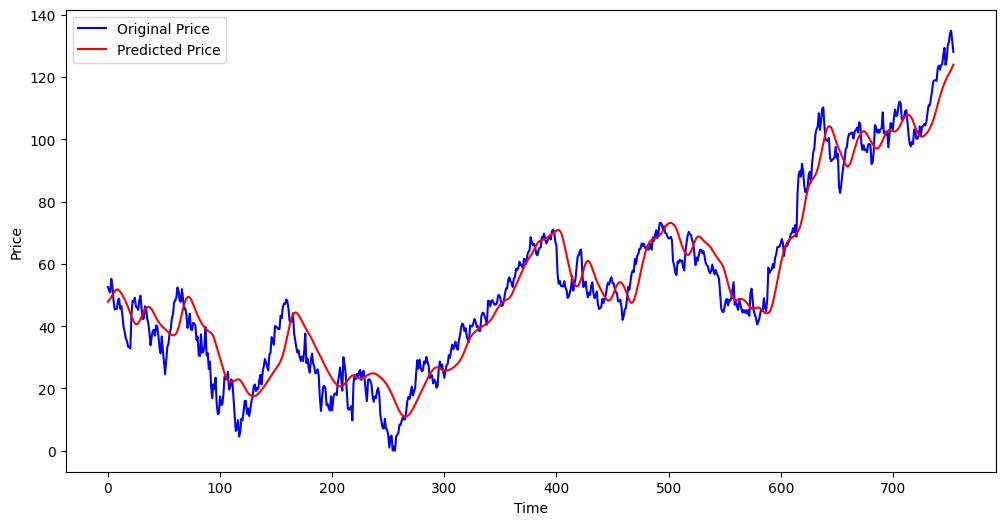

In [47]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [48]:
!pip install -q streamlit

In [49]:
!npm install localtunnel


added 22 packages in 11s

3 packages are looking for funding
  run `npm fund` for details


npm notice
npm notice New major version of npm available! 10.9.3 -> 11.6.0
npm notice Changelog: https://github.com/npm/cli/releases/tag/v11.6.0
npm notice To update run: npm install -g npm@11.6.0
npm notice


In [50]:
!streamlit run /content/drive/MyDrive/PythonProject/app.py &>/content/logs.txt & npx localtunnel --port 8501 & curl ipv4.icanhazip.com

& was unexpected at this time.
